<a href="https://colab.research.google.com/github/t-sasatani/wpt-analysis/blob/main/examples/measurement_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

if 'COLAB_GPU' in os.environ:
    !pip install git+https://github.com/t-sasatani/wpt-analysis

In [2]:
from wpt_tools import analysis

### Create instance of analysis and set initial variables

In [3]:
wpt_eval_ins = analysis.nw_tools()
rx_port = 2 # 1 or 2

### Import 2-port network data

In [4]:
mode = 'file'

if mode == 'file':
    wpt_eval_ins.import_touchstone('./assets/MAT3.s2p')

2024-09-03 12:33:45,250 : INFO : analysis.py - Loaded touchstone file: ./assets/MAT3.s2p


### Plot Z-parameters (full-range)

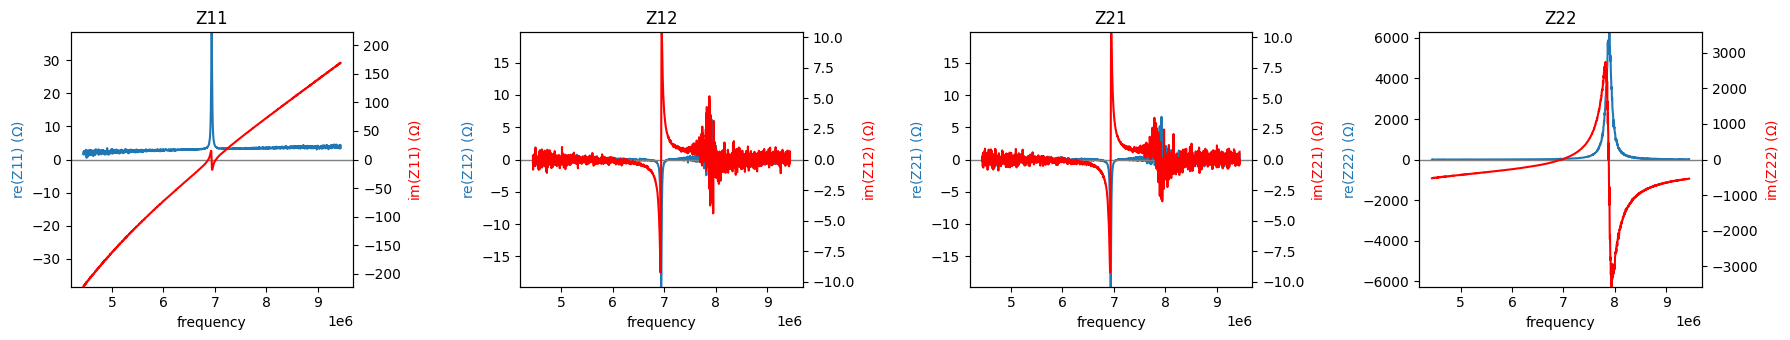

In [5]:
wpt_eval_ins.plot_z_full()

### Efficiency and optimal load analysis (for general 2-port networks)
This becomes unstable when the analysis frequency is far from the resonant frequency.
This is probably because to S to Z conversion becomes unstable.

2024-09-03 12:34:48,155 : INFO : analysis.py - Target frequency: 6.936e+06
2024-09-03 12:34:48,156 : INFO : analysis.py - Maximum efficiency: 0.07
2024-09-03 12:34:48,156 : INFO : analysis.py - Optimum Re(Zload): 33.61
2024-09-03 12:34:48,157 : INFO : analysis.py - Optimum Im(Zload): 93.53


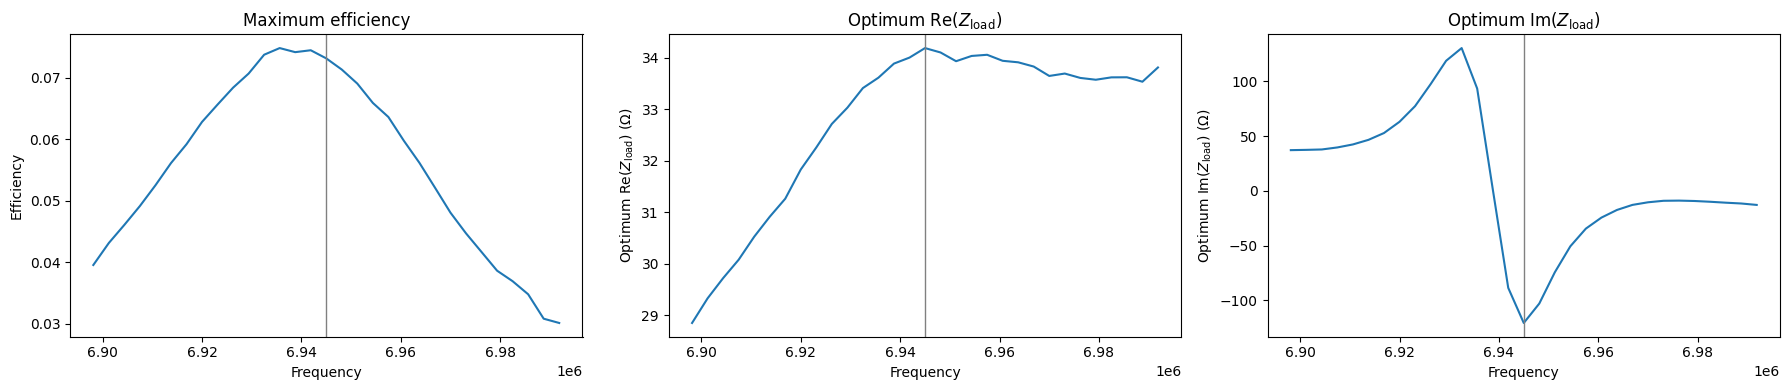

In [10]:
# For maximum efficiency analysis
target_f = 6.945e6
range_f = 1e5

wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
f_opt, eff_opt, r_opt, x_opt = wpt_eval_ins.efficiency_load_analysis(show_plot=True, rx_port=rx_port)

### Curve-fitting and Z-matrix plot (only for 2-port measurement of Series-Series LCR coupling)

2024-09-03 12:33:47,996 : INFO : analysis.py - R2 for fitting Ls2, Cs2: 0.927900
2024-09-03 12:33:48,049 : INFO : analysis.py - Self impedance at target frequency

2024-09-03 12:33:48,084 : INFO : analysis.py - Re(Z11): 3.05e+01
Im(Z11): -1.56e+01

2024-09-03 12:33:48,118 : INFO : analysis.py - Re(Z22): 3.68e+01
Im(Z22) -1.65e+01

2024-09-03 12:33:48,118 : INFO : analysis.py - Fitting values assuming a pair of series LCR resonators

C:\Users\Takuya\GitHub\wpt-tools\wpt_tools\analysis.py:340: RuntimeWarning: invalid value encountered in sqrt
  (ls1, cs1, rs1, 1/(2*np.pi*np.sqrt(ls1*cs1)), self.target_f, 2*np.pi*self.target_f*ls1/rs1))
2024-09-03 12:33:48,119 : INFO : analysis.py - Ls1: -3.94e-08, Cs1: 7.58e-04, Rs1: 1.44e+01, f_1: nan, Q_1 (approximate, @6.945e+06 Hz): -1.20e-01
2024-09-03 12:33:48,120 : INFO : analysis.py - Ls2: 2.87e-05, Cs2: 1.81e-11, Rs2: 3.21e+01, f_2: 6.976e+06, Q_2 (approximate, @6.945e+06 Hz): 3.90e+01
C:\Users\Takuya\GitHub\wpt-tools\wpt_tools\analysis.py:344: 

(-3.935598709328237e-08,
 0.0007581324195081334,
 array([14.3519862]),
 2.8725335013450897e-05,
 1.8117692475372982e-11,
 array([32.11031247]),
 array([2.11514591e-08]))

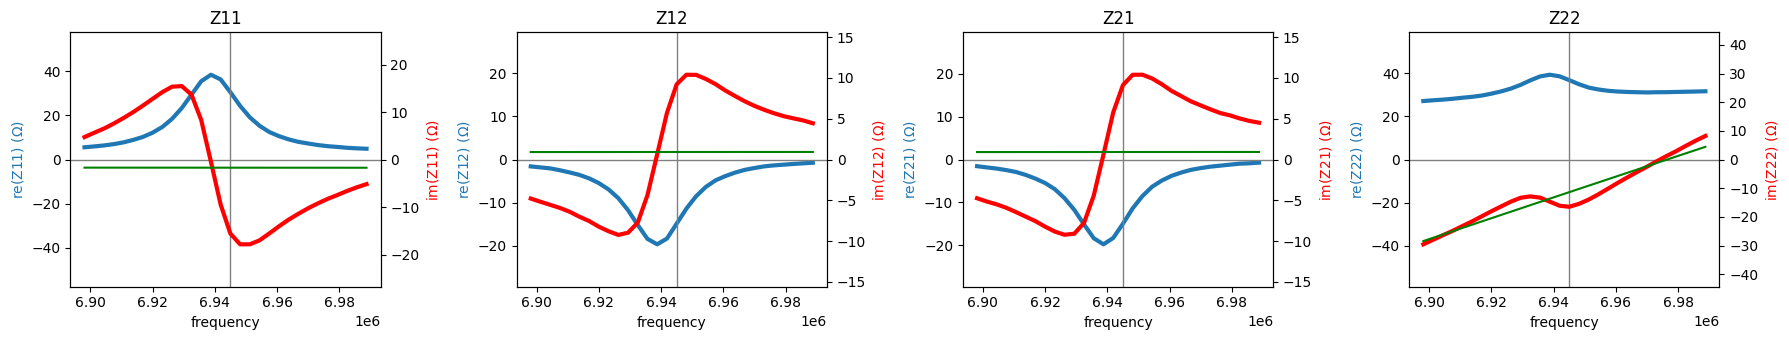

In [7]:
# For maximum efficiency analysis
wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
wpt_eval_ins.plot_z_narrow_fit()

### Optimal load visualization

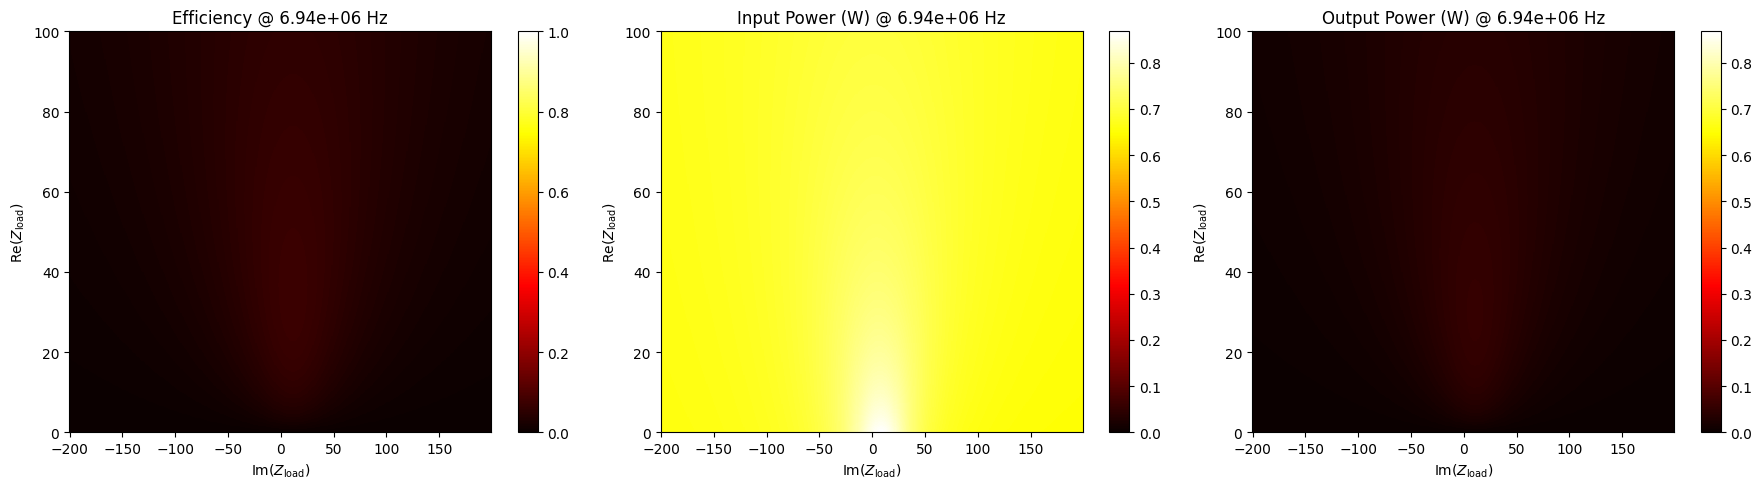

In [8]:
wpt_eval_ins.optimal_load_plot(min_rez=0.1, max_rez=100, step_rez=0.2,\
    min_imz=-200, max_imz=200, step_imz=1, input_voltage=5, rx_port=rx_port)

### Capacitor filter calculator
![](https://github.com/t-sasatani/wpt-analysis/blob/main/examples/img/CpCsRltopology.png?raw=1)

In [9]:
display(target_f)
wpt_eval_ins.set_f_target_range(
    target_f=target_f,
    range_f=range_f
    )

wpt_eval_ins.rxc_filter_calc(
    rx_port = rx_port,
    rload = 50,
    c_network = 'CpCsRl'
    )

6945000.0

2024-09-03 12:33:54,439 : INFO : analysis.py - Target frequency: 6.936e+06
2024-09-03 12:33:54,439 : INFO : analysis.py - Maximum efficiency: 0.07
2024-09-03 12:33:54,439 : INFO : analysis.py - Receiver inductance: 2.87e-05
2024-09-03 12:33:54,440 : INFO : analysis.py - Optimum load: 33.61
2024-09-03 12:33:54,440 : INFO : analysis.py - Target Rload: 50.00

2024-09-03 12:33:54,444 : INFO : analysis.py - [ 3.33353207e-11 -1.50328883e-11]


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 117
         Function evaluations: 226
